In [1]:
import pandas as pd           
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
import os


In [40]:
def ensure_directory_exists(output_directory: str):
    os.makedirs(output_directory, exist_ok=True)
    
File_Path="plots/Outputs_TXSN_2020Census/"
ensure_directory_exists(File_Path)
#csv_file = 'C:/Users/rob/projects/election/rob/ensembles/ensemble_TXSN_random_seed_2/votes_PRES20_Final.csv'
#data = np.genfromtxt(csv_file,delimiter=',')
#all_data = np.load('C:/Users/rob/projects/election/rob/ensembles/ensemble_TXSN_random_seed_2/votes_PRES20.npz')['arr_0']
all_data = np.load('C:/Users/rob/projects/election/rob/ensembles/ensemble_TXSN_random_seed_2/hisp_perc.npz')['arr_0']
data = all_data #all_data[:100000,:]

# Checking if districts carried by Democrats converges

In [11]:
stat=[]
for d in data:
    s=sum(x>.5 for x in d)
    stat.append(s)

In [12]:
x=range(len(stat))

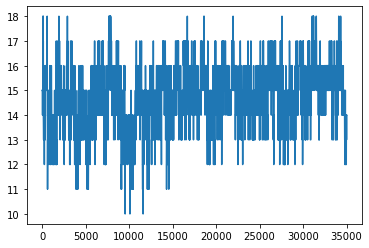

In [13]:
plt.plot(x,stat)

# Checking for convergence of mean value of vote shares across sorted districs

In [63]:
if False:
    mean_stat=np.array([sorted(list(data[0,:]))])
    for row in range(1,20000): # data.shape[0]):
        if row % 1000 == 0:
            print(row)
        mean_stat = np.r_[mean_stat,[list(np.mean(np.sort(data[range(row)]),axis=0))]]

rows, columns = np.shape(data)
data_sorted = np.sort(data,axis=1)
cumsum = np.cumsum(data, axis=0)
average = np.zeros(np.shape(cumsum))
for x in range(0, rows):
    average[x] = cumsum[x] / (x + 1)
mean_stat = average

(617270, 31)

In [24]:
print(mean_stat[1])
print(data[1])

[0.2171223  0.22758459 0.24223709 0.25339549 0.32107592 0.34878465
 0.34957119 0.37326097 0.37991018 0.38259378 0.40406889 0.4137685
 0.42894974 0.42989627 0.44853662 0.46948342 0.55239474 0.55476292
 0.55802911 0.56141039 0.56643755 0.57110951 0.57649653 0.57823715
 0.60146468 0.62170238 0.64704957 0.65102448 0.66503483 0.69095761
 0.74033475]
[0.2171223  0.22758459 0.24223709 0.25339549 0.32107592 0.34878465
 0.34957119 0.36645117 0.37326097 0.38259378 0.40406889 0.4137685
 0.42894974 0.42989627 0.44853662 0.46948342 0.55239474 0.55476292
 0.55802911 0.56643755 0.57056083 0.57110951 0.57649653 0.57823715
 0.60146468 0.62170238 0.64704957 0.65102448 0.66503483 0.69095761
 0.74033475]


In [56]:
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

<function matplotlib.pyplot.show(close=None, block=None)>

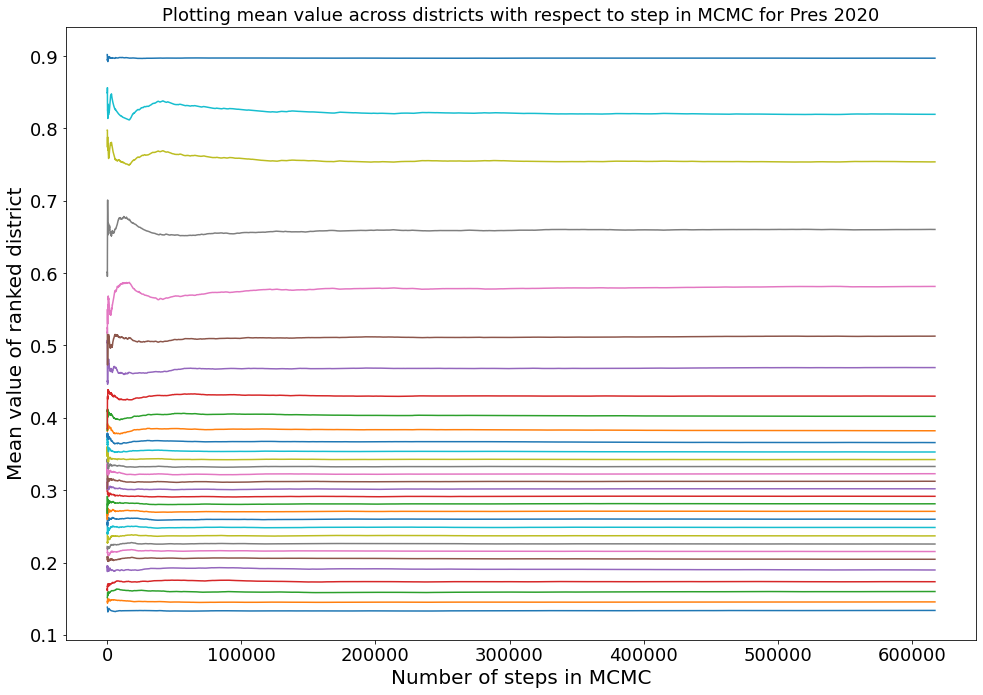

In [64]:
myplot=plt.figure(figsize=(14, 10))
plt.plot(np.arange(mean_stat.shape[0])+1,mean_stat[:,])
plt.xlabel('Number of steps in MCMC')
plt.ylabel('Mean value of ranked district')
plt.title('Plotting mean value across districts with respect to step in MCMC for Pres 2020')
#plt.legend(loc=2, fontsize=SMALL_SIZE)
plt.tight_layout()
plt.savefig(File_Path +"Pres_20_MeanAcrossMCMC.pdf")
plt.savefig(File_Path + "Pres_20_MeanAcrossMCMC.png")
plt.show

[[0.03391882 0.00632219 0.05253126 0.05621779 0.03087371 0.01711469
  0.02517984 0.01496007 0.01651448 0.02004918 0.01166442 0.00396726
  0.0119623  0.02342505 0.00090329 0.03126935 0.04396402 0.01750477
  0.04540859 0.04744857 0.02243105 0.0001757  0.04792822 0.10498807
  0.07319153 0.01114548 0.09786143 0.08917927 0.05817249 0.03603315
  0.00561246]
 [0.03391882 0.00632219 0.05253126 0.05621779 0.03087371 0.01711469
  0.02517984 0.01496007 0.01651448 0.02004918 0.00367426 0.01249446
  0.02261408 0.02904275 0.00061918 0.00846404 0.04396402 0.01750477
  0.04540859 0.04744857 0.02243105 0.0001757  0.04792822 0.10498807
  0.07319153 0.01114548 0.09786143 0.08917927 0.05817249 0.03603315
  0.00561246]
 [0.03391882 0.00632219 0.05253126 0.05621779 0.03087371 0.01711469
  0.02517984 0.01496007 0.01651448 0.02004918 0.00101087 0.0179817
  0.02616467 0.03091531 0.00112668 0.00925879 0.02316862 0.01750477
  0.04540859 0.04744857 0.02243105 0.0001757  0.0462462  0.08312976
  0.07319153 0.011145

<function matplotlib.pyplot.show(close=None, block=None)>

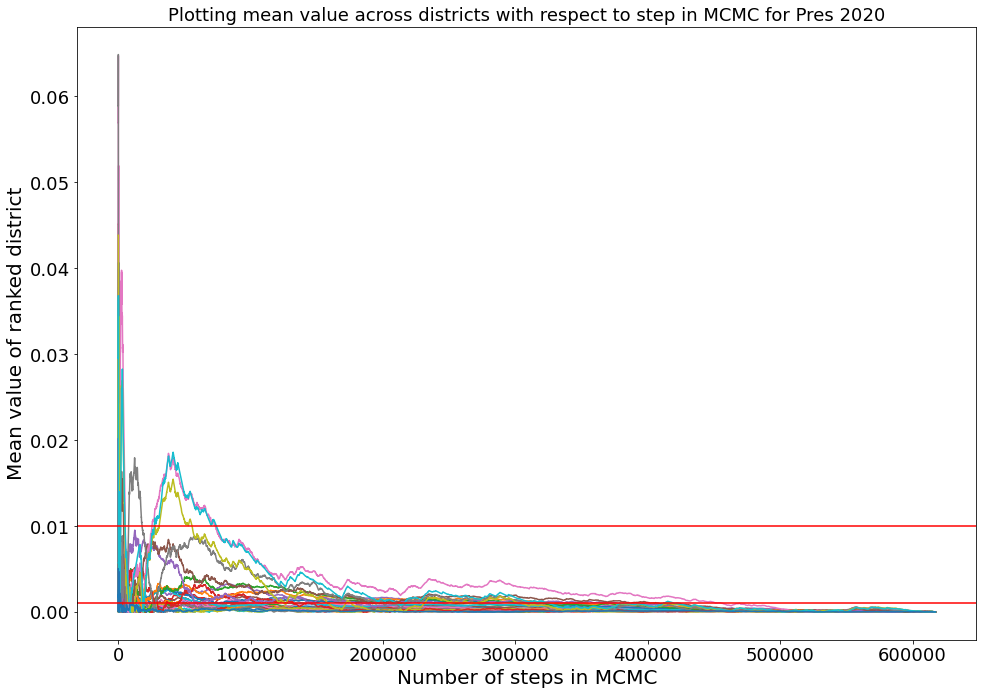

In [81]:
myplot=plt.figure(figsize=(14, 10))
final_averages = mean_stat[-1]
differences = np.zeros(np.shape(mean_stat))
rows, columns = np.shape(mean_stat)
for x in range(0, rows):
    differences[x] = abs(mean_stat[x] - final_averages)
plt.plot(np.arange(mean_stat.shape[0])+1,differences[:,])
plt.xlabel('Number of steps in MCMC')
plt.ylabel('Mean value of ranked district')
plt.title('Plotting mean value across districts with respect to step in MCMC for Pres 2020')
#plt.legend(loc=2, fontsize=SMALL_SIZE)
plt.tight_layout()
plt.savefig(File_Path +"Pres_20_MeanAcrossMCMC.pdf")
plt.savefig(File_Path + "Pres_20_MeanAcrossMCMC.png")
plt.axhline(y=0.01, color='r', linestyle='-')
plt.axhline(y=0.001, color='r', linestyle='-')
plt.show

# Plotting violin plots with varying number of ensembles

IndexError: index 3 is out of bounds for axis 0 with size 3

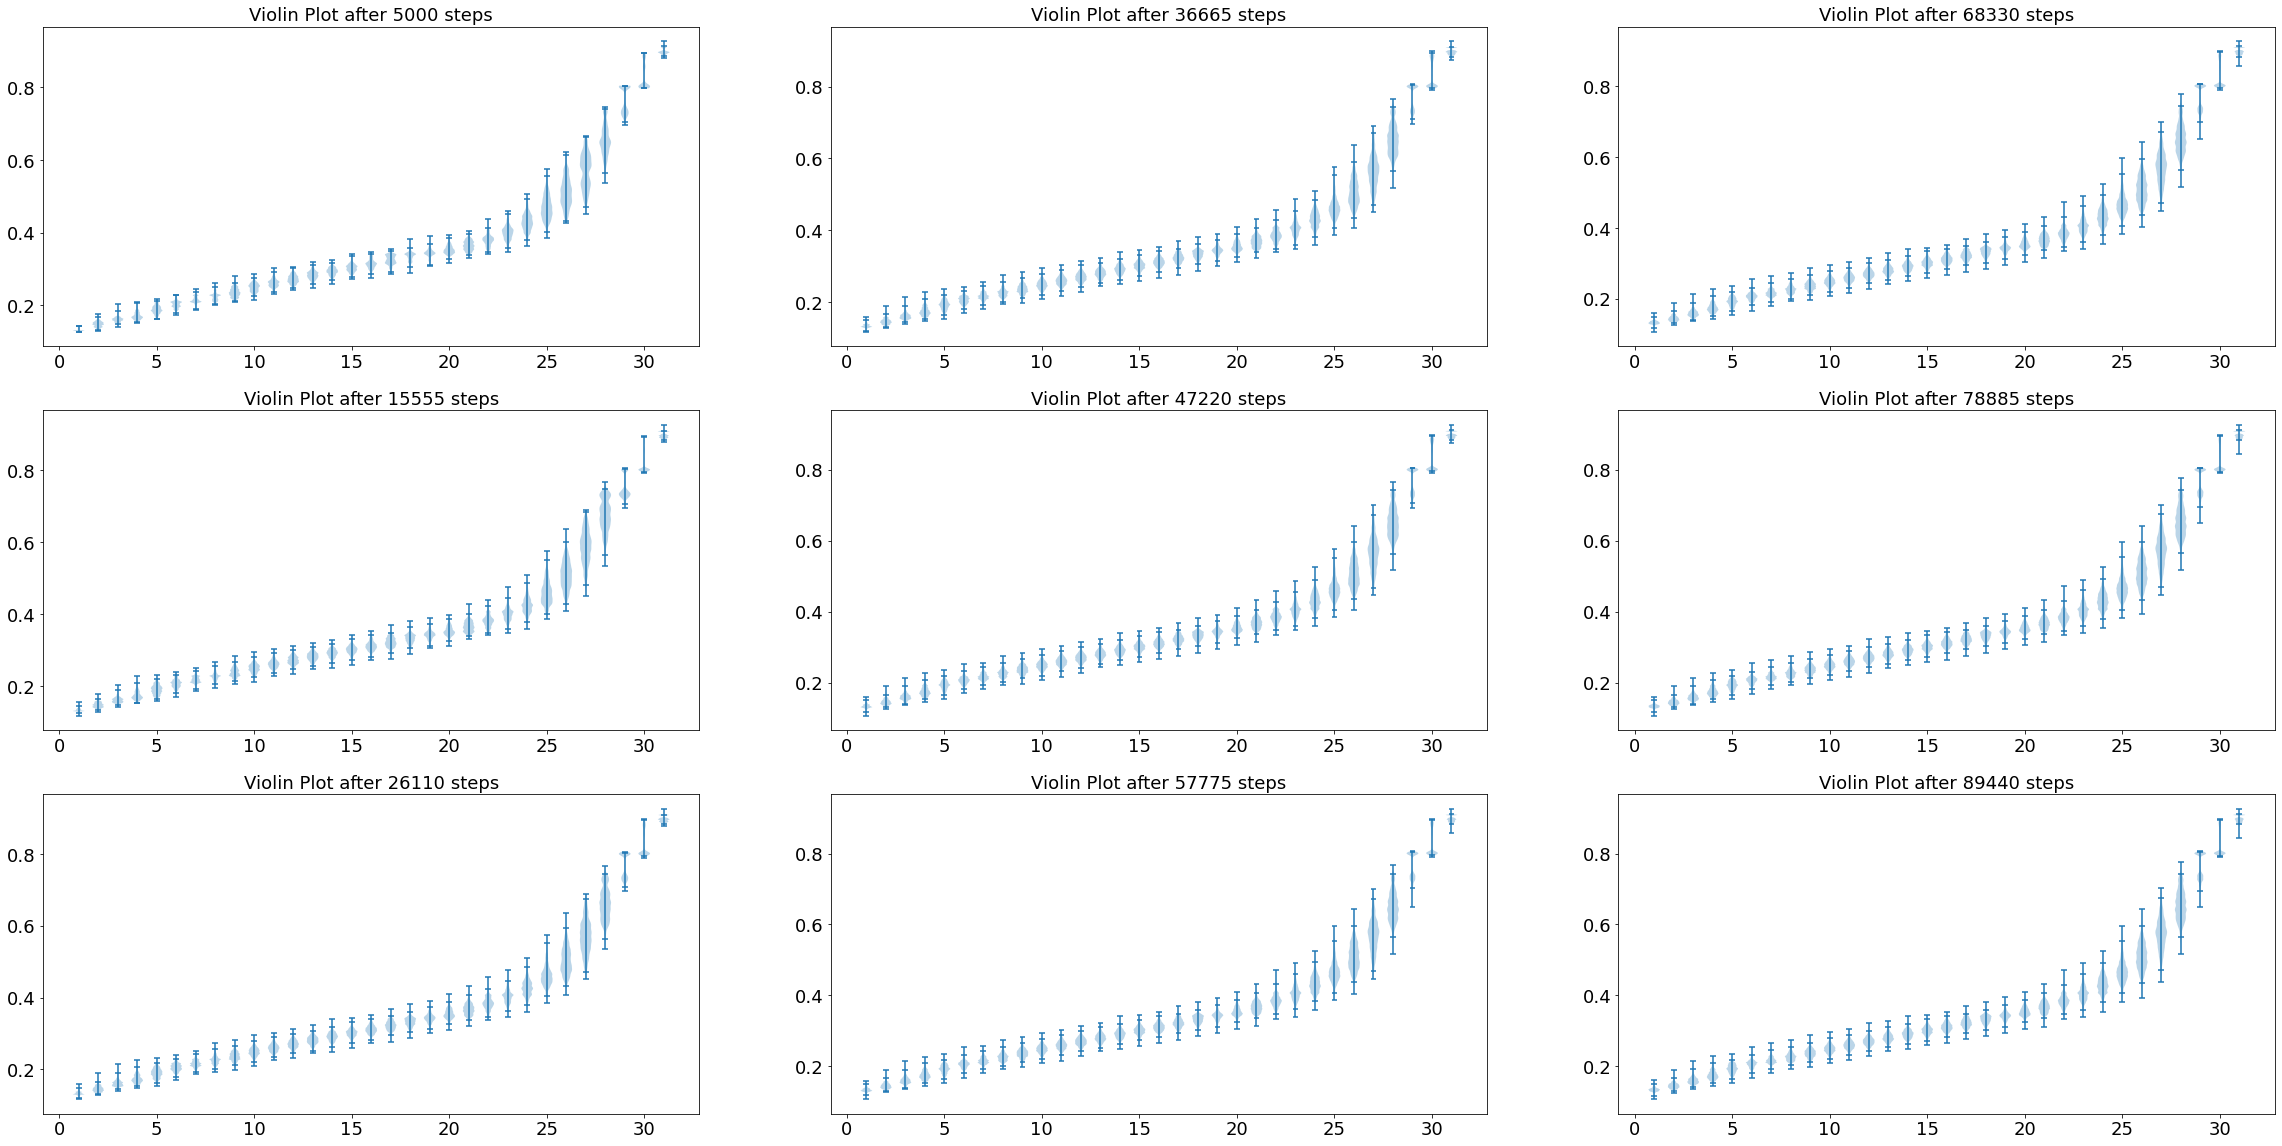

In [41]:
myplot,ax = plt.subplots(3,3,figsize=(40, 20))
ii=0
jj=0
row,col=data.shape
for s in range(5000,row,int((row-5000)/9)):
    d = data[range(s),:]
    ensemble=d.T
    row_v,col_v = ensemble.shape
    V_in = [ensemble[ii,range(0,col_v)] for ii in range(row_v)]
    dist = np.arange(row_v)+1
    violin_parts = ax[jj][ii].violinplot(V_in,dist, widths=0.6, quantiles=[[0.01, 1-0.01] for ii in dist])
    ax[jj][ii].title.set_text('Violin Plot after '+str(s)+' steps')
    jj+=1
    if jj%3==0:
        jj=0
        ii+=1
plt.savefig(File_Path +"Pres_20_ViolinPlots_MCMC_Step_Comparison.pdf")
plt.savefig(File_Path + "Pres_20_ViolinPlots_MCMC_Step_Comparison.png")
 

# Computing and comparing Two-sample Kolmogorov–Smirnov statistic.

### In steps of "step_size" ensembles, the election statistics are compared across districts using the Two-sample Kolmogorov–Smirnov score. These scores are plotted along with the curve c(alpha)((m+n)/mn)^.5 where m and n are the sample sizes. According to Wikipedia, the null-hypothesis is rejected at level alpha if the KS score is larger than this value. 

In [32]:
data_sorted = np.sort(data,axis=1)

In [33]:
from scipy.stats import ks_2samp

row,col=data_sorted.shape
step_size = 1000
start = step_size
step = int((row-start)/step_size)
#sample = 500
for s in range(start,row,step):
    if s % 1000 == 0:
        print(s)
#    d_1 = data_sorted[range(max(0,s-step_size),s),:]
#    d_2 = data_sorted[range(s,min(s+step_size,row)),:]
    d_1 = data_sorted[range(max(step_size,s-step_size)),:]
    d_2 = data_sorted[range(s),:]
    ks_data = list(ks_2samp(d_1[:,ii],d_2[:,ii]))
    if s==start:
        KS_stats = np.matrix([[ks_data[0] for ii in range(col)]])
        KS_pval = np.matrix([[ks_data[1] for ii in range(col)]])
    else:
        KS_stats = np.vstack([KS_stats,[ks_data[0] for ii in range(col)]])
        KS_pval = np.vstack([KS_pval,[ks_data[1] for ii in range(col)]])
    


1000
78000
155000
232000
309000
386000
463000
540000
617000


C:\Users\rob\AppData\Local\Temp/ipykernel_19876/3049035432.py:5: RuntimeWarning: overflow encountered in long_scalars
  cut_off = [c_alpha*np.sqrt((x_KS[ii-1]+x_KS[ii])/(x_KS[ii-1]*x_KS[ii])) for ii in range(1,len(x_KS))]
C:\Users\rob\AppData\Local\Temp/ipykernel_19876/3049035432.py:5: RuntimeWarning: invalid value encountered in sqrt
  cut_off = [c_alpha*np.sqrt((x_KS[ii-1]+x_KS[ii])/(x_KS[ii-1]*x_KS[ii])) for ii in range(1,len(x_KS))]


<function matplotlib.pyplot.show(close=None, block=None)>

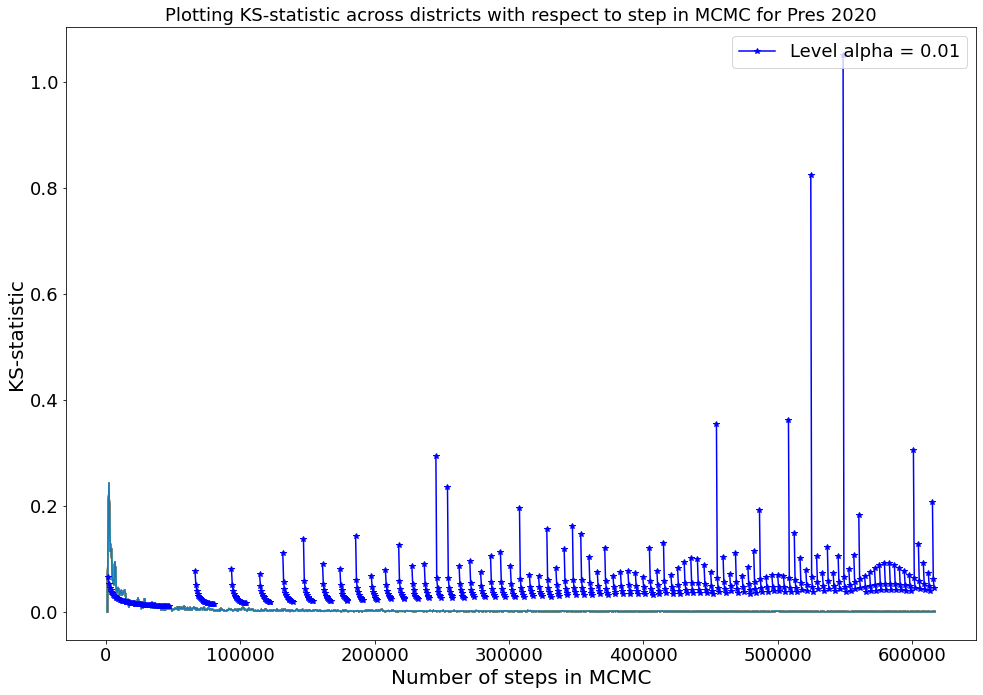

In [34]:
myplot=plt.figure(figsize=(14, 10))
x_KS=np.arange(start,row,step)
alpha = .01
c_alpha = np.sqrt(-.5*np.log(alpha/2))
cut_off = [c_alpha*np.sqrt((x_KS[ii-1]+x_KS[ii])/(x_KS[ii-1]*x_KS[ii])) for ii in range(1,len(x_KS))]
plt.plot(x_KS,KS_stats[:,])
plt.plot(x_KS[range(1,len(x_KS))],cut_off,'b-*',label='Level alpha = '+str(alpha))
#plt.hlines(.05,0,data.shape[0],linestyles='dashed')
plt.xlabel('Number of steps in MCMC')
plt.ylabel('KS-statistic')
plt.title('Plotting KS-statistic across districts with respect to step in MCMC for Pres 2020')
plt.legend(loc=1, fontsize=SMALL_SIZE)
#plt.legend(loc=2, fontsize=SMALL_SIZE)
plt.tight_layout()
plt.savefig(File_Path +"Pres_20_KSAcrossMCMC.pdf")
plt.savefig(File_Path + "Pres_20_KSAcrossMCMC.png")
plt.show